[View in Colaboratory](https://colab.research.google.com/github/AkshayRam12/Notebooks/blob/master/MNIST_CNN.ipynb)

## This is a simple Convolutional neural network which will be trained on the MNIST dataset to recognize handwritten digits.

## Difference from the previous model is that we will use image processing techniques to classify the digits instead of just learning data patterns

In [0]:
# import required libraries

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import matplotlib.pyplot as plt

# fix random seed for reproducability
seed = 7
numpy.random.seed(seed)

# set image ordering
K.set_image_dim_ordering('th')


In [14]:
# load the dataset

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("training set size = ", X_train.shape)
print("test set size = ", X_test.shape)

# reshaping the data to [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
print("sizes after reshaping :")
print("training set size = ", X_train.shape)
print("test set size = ", X_test.shape)

# normalize the inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

# one hot encoding of labels
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_train.shape[1]
print("number of classes = ", num_classes)


training set size =  (60000, 28, 28)
test set size =  (10000, 28, 28)
sizes after reshaping :
training set size =  (60000, 1, 28, 28)
test set size =  (10000, 1, 28, 28)
number of classes =  10


In [0]:
# define the CNN model

def cnn_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(1,28,28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  
  # compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 231s - loss: 0.3900 - acc: 0.8750 - val_loss: 0.0794 - val_acc: 0.9763
Epoch 2/10
 - 231s - loss: 0.0978 - acc: 0.9694 - val_loss: 0.0522 - val_acc: 0.9844
Epoch 3/10
 - 231s - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 4/10
 - 231s - loss: 0.0584 - acc: 0.9818 - val_loss: 0.0332 - val_acc: 0.9895
Epoch 5/10
 - 231s - loss: 0.0477 - acc: 0.9849 - val_loss: 0.0310 - val_acc: 0.9888
Epoch 6/10
 - 231s - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0294 - val_acc: 0.9894
Epoch 7/10
 - 231s - loss: 0.0371 - acc: 0.9881 - val_loss: 0.0298 - val_acc: 0.9901
Epoch 8/10
 - 231s - loss: 0.0337 - acc: 0.9888 - val_loss: 0.0239 - val_acc: 0.9916
Epoch 9/10
 - 231s - loss: 0.0318 - acc: 0.9905 - val_loss: 0.0248 - val_acc: 0.9916
Epoch 10/10
 - 231s - loss: 0.0282 - acc: 0.9908 - val_loss: 0.0263 - val_acc: 0.9918


Results :


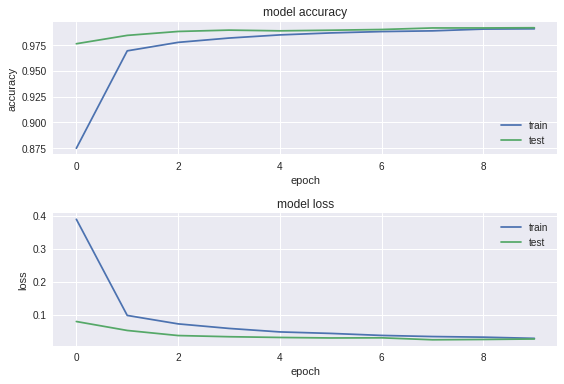

In [18]:
# build model
model = cnn_model()

# fit the model ( training)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# plotting metrics

print("\n\nResults :")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()